# DIABETIC ANALYSIS USING LOGISTIC REGRESSION

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [40]:
data.head()

,preg,glucose,bp,skin,insulin,bmi,pedigree,label
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


### Importing dataset and changing column names accordingly

In [13]:
col_names = ['preg','glucose','bp','skin','insulin','bmi','pedigree','age','label']
data = pd.read_csv('Dataset/diabetes.csv',header=0, names=col_names)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
data.drop("age",axis=1,inplace=True) #I don't know how but dropping this increased the accuracy 

In [16]:
# # split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('label',axis=1),
                                   data['label'], test_size = 0.30, 
                                   random_state = 101 ) 

### CHANGING SERIES DATAFRAME TO ARRAY 

In [17]:
y_train = y_train.to_numpy()

In [18]:
y_train.ndim

1

In [19]:
y_train = np.reshape(y_train,(537,1))

In [20]:
y_train.shape

(537, 1)

In [21]:
y_train.ndim

2

In [22]:
y_test = y_test.to_numpy()

In [23]:
y_test = np.reshape(y_test,(231,1))

In [24]:
y_train.shape

(537, 1)

In [25]:
y_train.ndim

2

In [26]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression()

In [27]:
#predicting the output for out test set
y_pred=logreg.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7922077922077922


In [29]:
# import the metrics class to create confusion matrics
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix 

array([[134,  16],
       [ 32,  49]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

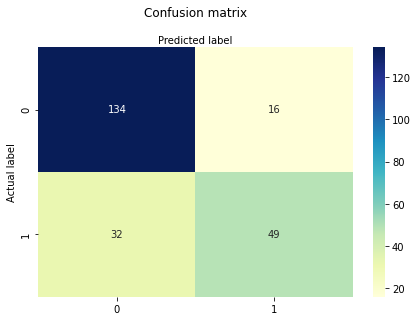

In [30]:
#Ploting the Confusion Matrics
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
import pickle 

In [32]:
#saving the model to disk 
pickle.dump(logreg, open('model.pkl','wb'))

In [33]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[6,148,72,35,0,33.6,0.627]]))

[1]


In [34]:
X_test

,preg,glucose,bp,skin,insulin,bmi,pedigree
766,1,126,60,0,0,30.1,0.349
748,3,187,70,22,200,36.4,0.408
42,7,106,92,18,0,22.7,0.235
485,0,135,68,42,250,42.3,0.365
543,4,84,90,23,56,39.5,0.159
...,...,...,...,...,...,...,...
188,8,109,76,39,114,27.9,0.640
8,2,197,70,45,543,30.5,0.158
645,2,157,74,35,440,39.4,0.134
381,0,105,68,22,0,20.0,0.236


In [35]:
y_test

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    